In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import math
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
import graphviz
from sklearn import svm
from sklearn import neighbors

In [3]:
titanic_train = pd.read_csv("sample_data/titanic_train.csv")
titanic_test = pd.read_csv("sample_data/titanic_test.csv")

In [4]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic_train_wo_label = titanic_train.drop(axis=1, labels='Survived')
titanic_full_dataset = pd.concat([titanic_train_wo_label, titanic_test])

### EDA

In [6]:
titanic_full_dataset.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [7]:
titanic_full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [8]:
titanic_full_dataset.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
titanic_full_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_full_dataset.groupby(['Sex']).size().reset_index(name="Count")

,Sex,Count
0,female,466
1,male,843


In [11]:
titanic_full_dataset.groupby(['Embarked']).size().reset_index(name="Count")

,Embarked,Count
0,C,270
1,Q,123
2,S,914


In [12]:
titanic_full_dataset.groupby(['Pclass']).size().reset_index(name="Count")

,Pclass,Count
0,1,323
1,2,277
2,3,709


In [13]:
titanic_full_dataset.groupby(['Pclass'])['Age'].mean().reset_index(name="Average age")

,Pclass,Average age
0,1,39.159930
1,2,29.506705
2,3,24.816367


### Now, let's look only at the training data and do some EDA as well as pre-processing

In [14]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
titanic_train.groupby(['Sex']).size().reset_index(name="Count")

,Sex,Count
0,female,314
1,male,577


<ipython-input-19-0b9ca85414c2>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


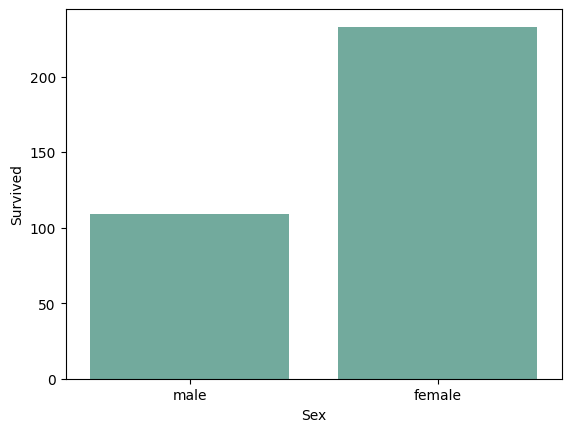

In [19]:
sns.barplot(
    x="Sex",
    y="Survived",
    data=titanic_train,
    estimator=sum,
    ci=None,
    color='#69b3a2');

In [20]:
age_bins= [0, 18, 25, 34, 54, 64, 100]
age_labels= ['0-18', '19-25', '26-34', '35-54', '55-64', '65+']
titanic_train['age_binned'] = pd.cut(titanic_train['Age'], bins=age_bins, labels=age_labels)

In [21]:
age_binned_group1 = titanic_train.groupby(['age_binned']).size().reset_index(name="Count")
age_binned_group2 = titanic_train[titanic_train['Survived'] == 1.0].groupby(['age_binned']).size().reset_index(name="Survived")
age_binned_pct = age_binned_group1.merge(age_binned_group2, on="age_binned")
age_binned_pct['survived_pct'] = age_binned_pct['Survived']/age_binned_pct['Count']
age_binned_pct

,age_binned,Count,Survived,survived_pct
0,0-18,139,70,0.503597
1,19-25,162,54,0.333333
2,26-34,177,72,0.406780
3,35-54,194,81,0.417526
4,55-64,31,12,0.387097
5,65+,11,1,0.090909


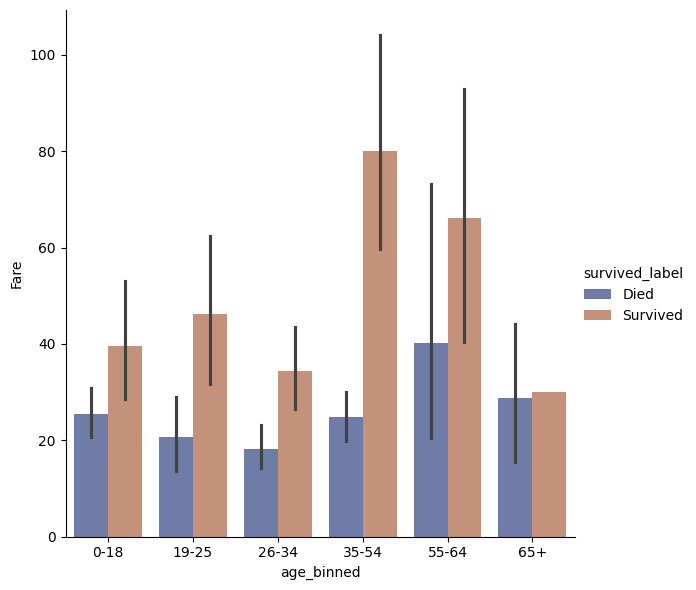

In [22]:
titanic_train['survived_label'] = titanic_train['Survived'].apply(lambda x: "Survived" if x ==1 else "Died")

g = sns.catplot(
    data=titanic_train, kind="bar",
    x="age_binned", y="Fare", hue="survived_label",
    palette="dark", alpha=.6, height=6
)

In [23]:
titanic_train.groupby('Survived')['PassengerId'].count().reset_index(name="count_uniqueID")

,Survived,count_uniqueID
0,0,549
1,1,342


In [24]:
titanic_train.groupby('Ticket').size().reset_index(name="Count")

,Ticket,Count
0,110152,3
1,110413,3
2,110465,2
3,110564,1
4,110813,1
...,...,...
676,W./C. 6608,4
677,W./C. 6609,1
678,W.E.P. 5734,1
679,W/C 14208,1


In [26]:
titanic_train[titanic_train['Ticket'] == "W./C. 6608"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_binned,survived_label
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,NaN,S,0-18,Died
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S,0-18,Died
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,NaN,S,19-25,Died
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S,35-54,Died


In [27]:
#Finish pre-processing
def pre_process(df, vars_to_dummy):
    #dummies
    df_d = df[df['Embarked'].notna()]
    df_d_1 = df_d[df_d['Age'].notna()]
    df_d_2 = df_d_1[df_d_1['Fare'].notna()]
    df_d_3 = pd.get_dummies(df_d_2, columns=vars_to_dummy)
    return df_d_3

In [28]:
vars_to_dummy = ['Sex','Embarked']
training_set_d = pre_process(titanic_train, vars_to_dummy)
training_set_d.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,age_binned,survived_label,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,19-25,Died,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,35-54,Survived,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,26-34,Survived,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,35-54,Survived,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,35-54,Died,False,True,False,False,True


In [29]:
training_set_d.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'age_binned', 'survived_label', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [30]:
training_set_d.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             529
age_binned          0
survived_label      0
Sex_female          0
Sex_male            0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
dtype: int64

In [31]:
#X = training_set_d[training_set_d.columns[~training_set_d.columns.isin(['Survived', 'survived_label', 'age_binned', 'Name', 'Cabin', 'PassengerId'])]]
y = training_set_d['Survived']

In [32]:
X = training_set_d.drop(axis=1, labels= ['Survived', 'survived_label', 'age_binned', 'Name', 'Cabin', 'PassengerId', 'Sex_male', 'Ticket'])

Now we will take the training data and split it into training and validation sets

In [33]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = .2)

###Model functions



In [34]:
def fit_model(model, X_train, y_train, importance_flag=False):
    if type(model) == sklearn.linear_model._logistic.LogisticRegression and importance_flag:
        clf = model.fit(X_train, y_train)
        df = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":abs(clf.coef_[0])}).sort_values(by="Coefficients", ascending=False)
        print(df)
        return clf
    elif type(model) == sklearn.ensemble._forest.RandomForestClassifier and importance_flag:
        clf = model.fit(X_train, y_train)
        df = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":abs(clf.feature_importances_)}).sort_values(by="Coefficients", ascending=False)
        print(df)
        return clf
    else:
        clf = model.fit(X_train, y_train)
        return clf


def evaluate(model_list, X_train, y_train, X_test, y_test):
    for model in model_list:
        clf = fit_model(model, X_train, y_train)
        y_pred = clf.predict(X_test)
        cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
        disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        print(model)
        print(metrics.classification_report(y_test, y_pred))
        disp.plot()
        plt.show()

def predict_scores(clf, X_test):
    y_pred = clf.predict_proba(X_test)[:,1]
    return y_pred

## Model fitting and interpretation

In [35]:
lr_penalized = linear_model.LogisticRegression(penalty='l1', solver='liblinear')
lr_penalized_model = fit_model(lr_penalized, X_train, y_train, importance_flag=True)

      Feature  Coefficients
5  Sex_female      2.454767
0      Pclass      0.934949
6  Embarked_C      0.685344
2       SibSp      0.306095
8  Embarked_S      0.149415
1         Age      0.037992
3       Parch      0.024407
4        Fare      0.002260
7  Embarked_Q      0.000000


In [36]:
rf = ensemble.RandomForestClassifier()

In [37]:
rf_model = fit_model(rf, X_train, y_train, importance_flag=True)

      Feature  Coefficients
1         Age      0.295297
4        Fare      0.258674
5  Sex_female      0.240533
0      Pclass      0.075341
2       SibSp      0.053252
3       Parch      0.040825
6  Embarked_C      0.017297
8  Embarked_S      0.013072
7  Embarked_Q      0.005710


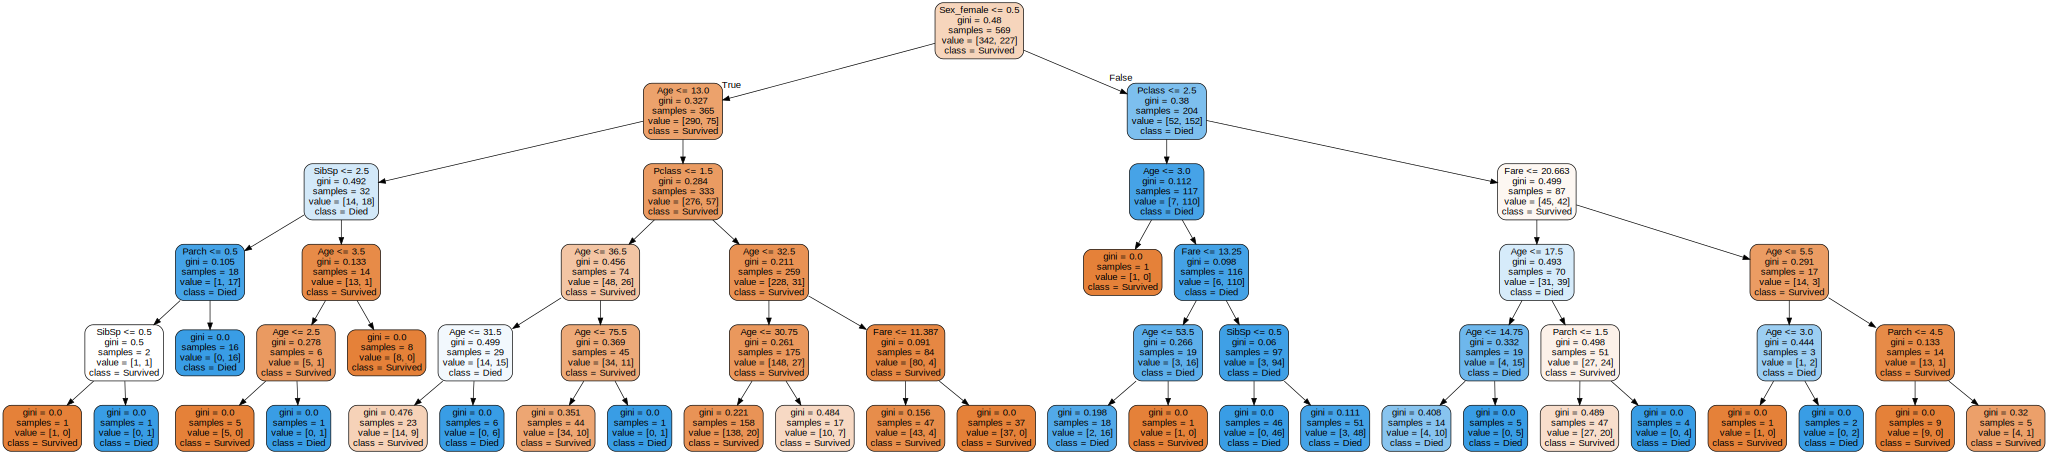

In [38]:
dec_tree = fit_model(tree.DecisionTreeClassifier(max_depth=5), X_train, y_train)
y_pred = dec_tree.predict(X_test)
class_names = ['Survived', 'Died']
export_graphviz(
dec_tree, feature_names=X_train.columns, class_names=class_names, rounded=True, filled=True, out_file="tree.dot")
graphviz.render('dot', 'png', "tree.dot")
graphviz.Source.from_file("tree.dot")

## And now let's compare results for all the different models and choose our best model

DummyClassifier(strategy='most_frequent')
              precision    recall  f1-score   support

           0       0.57      1.00      0.73        82
           1       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


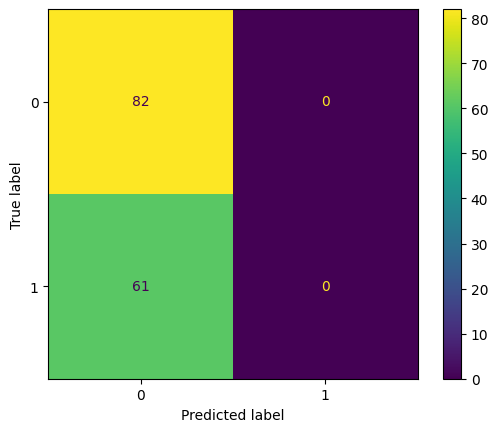

LogisticRegression(max_iter=5000)
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        82
           1       0.81      0.72      0.77        61

    accuracy                           0.81       143
   macro avg       0.81      0.80      0.80       143
weighted avg       0.81      0.81      0.81       143



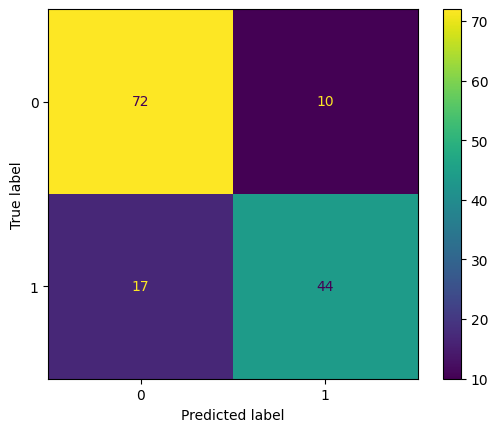

In [39]:
dummy = DummyClassifier(strategy="most_frequent")
logistic = LogisticRegression(max_iter=5000)
model_list = [dummy, logistic]
evaluate(model_list, X_train, y_train, X_test, y_test)

LogisticRegression(penalty='l1', solver='liblinear')
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        82
           1       0.80      0.72      0.76        61

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.80       143
weighted avg       0.80      0.80      0.80       143



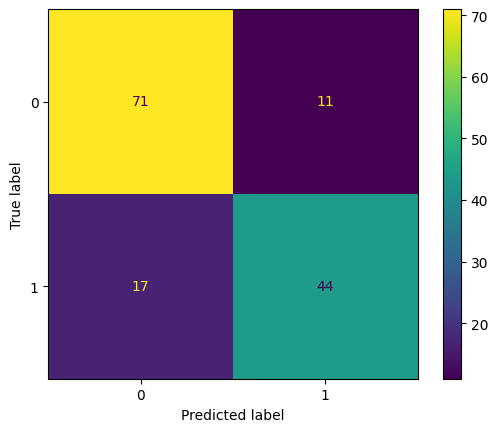

In [40]:
model_list = [lr_penalized]
evaluate(model_list, X_train, y_train, X_test, y_test)

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        82
           1       0.73      0.85      0.79        61

    accuracy                           0.80       143
   macro avg       0.80      0.81      0.80       143
weighted avg       0.81      0.80      0.81       143



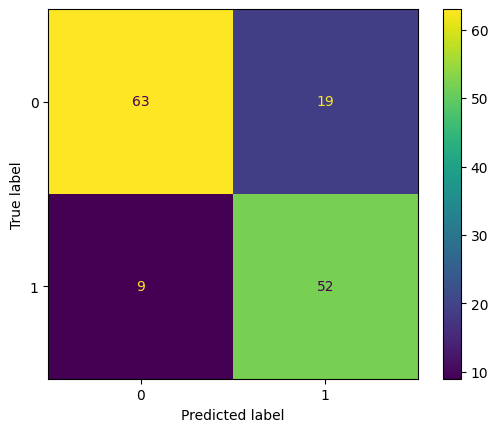

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.85      0.78      0.82        82
           1       0.74      0.82      0.78        61

    accuracy                           0.80       143
   macro avg       0.79      0.80      0.80       143
weighted avg       0.80      0.80      0.80       143



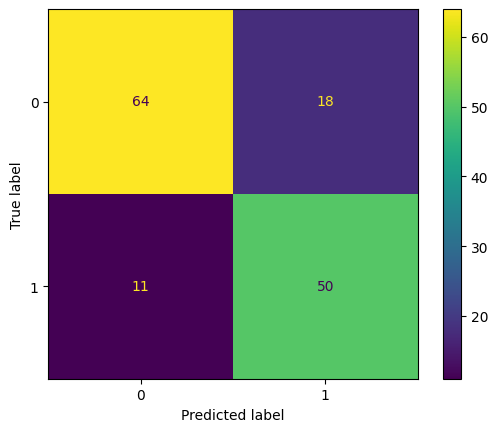

In [41]:
dt = tree.DecisionTreeClassifier()
model_list = [dt, rf]
evaluate(model_list, X_train, y_train, X_test, y_test)

### Now for some less interpretable models

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)
              precision    recall  f1-score   support

           0       0.87      0.80      0.84        82
           1       0.76      0.84      0.80        61

    accuracy                           0.82       143
   macro avg       0.81      0.82      0.82       143
weighted avg       0.82      0.82      0.82       143



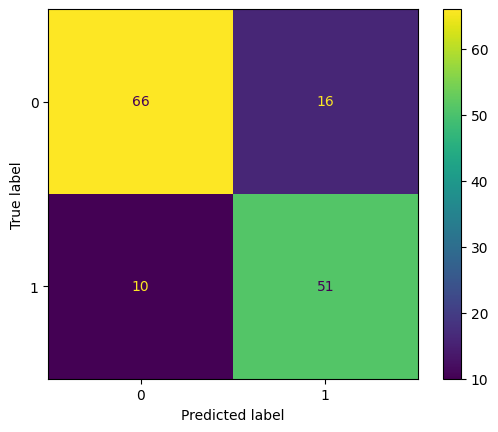

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        82
           1       0.65      0.52      0.58        61

    accuracy                           0.68       143
   macro avg       0.67      0.66      0.66       143
weighted avg       0.68      0.68      0.67       143



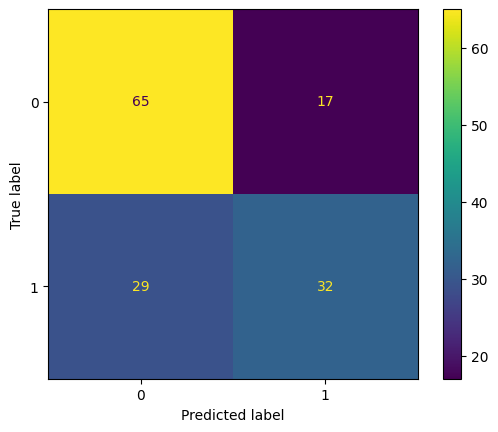

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, n_estimators=10,
                           subsample=0.5)
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        82
           1       0.90      0.62      0.74        61

    accuracy                           0.81       143
   macro avg       0.84      0.79      0.80       143
weighted avg       0.83      0.81      0.80       143



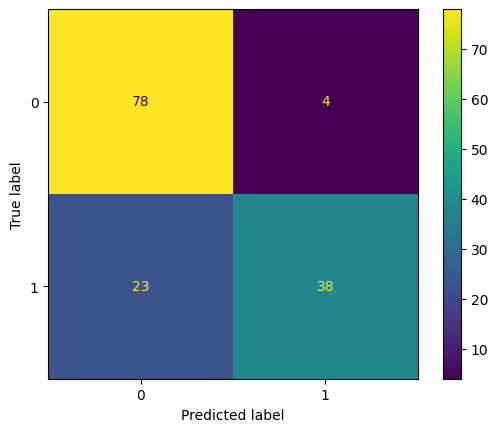

BaggingClassifier(estimator=LogisticRegression(C=100000.0, n_jobs=-1))
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        82
           1       0.78      0.74      0.76        61

    accuracy                           0.80       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



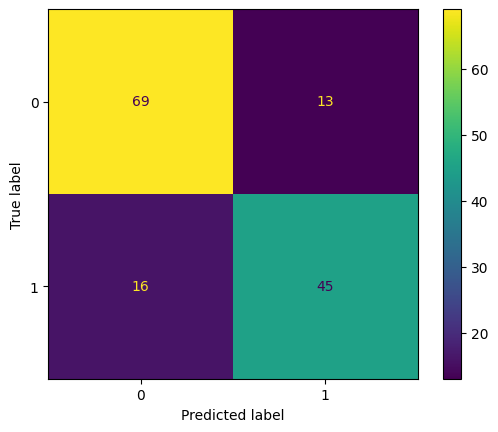

In [42]:
ab =  ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200)
knn = neighbors.KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
gb = ensemble.GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10)
bg = ensemble.BaggingClassifier(linear_model.LogisticRegression(penalty='l2', C=1e5, n_jobs=-1))
model_list = [ab, knn, gb, bg]
evaluate(model_list, X_train, y_train, X_test, y_test)

### Another form of evaluation is K-fold evaluation

In [43]:
def kfold_evaluate(X, y, model_list, splits):
    kf = model_selection.KFold(n_splits=splits)
    X_k = np.array(X)
    y_k = np.array(y)
    for train_index, test_index in kf.split(X_k):
        #print(train_index)
        #print(test_index)
        X_train, X_test = X_k[train_index], X_k[test_index]
        y_train, y_test = y_k[train_index], y_k[test_index]
        for model in model_list:
            print(model)
            clf = model.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            print(metrics.classification_report(y_test, y_pred))

In [44]:
model_list = [dummy, lr_penalized, logistic, dt, rf, ab, knn, gb, bg]
kfold_evaluate(X, y, model_list, 4)

DummyClassifier(strategy='most_frequent')
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       117
           1       0.00      0.00      0.00        61

    accuracy                           0.66       178
   macro avg       0.33      0.50      0.40       178
weighted avg       0.43      0.66      0.52       178

LogisticRegression(penalty='l1', solver='liblinear')
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       117
           1       0.67      0.72      0.69        61

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.79      0.78      0.78       178

LogisticRegression(max_iter=5000)
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       117
           1       0.67      0.70      0.69        61

    accuracy                           0.78       178

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.82      0.85      0.83       117
           1       0.68      0.64      0.66        61

    accuracy                           0.78       178
   macro avg       0.75      0.74      0.75       178
weighted avg       0.77      0.78      0.77       178

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       117
           1       0.69      0.70      0.70        61

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       117
           1       0.43      0.36      0.39     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.82      0.93      0.87       100
           1       0.89      0.73      0.80        78

    accuracy                           0.84       178
   macro avg       0.85      0.83      0.84       178
weighted avg       0.85      0.84      0.84       178

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       100
           1       0.84      0.79      0.82        78

    accuracy                           0.84       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.84      0.84      0.84       178

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)
              precision    recall  f1-score   support

           0       0.68      0.80      0.74       100
           1       0.67      0.53      0.59     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      0.87      0.81        99
           1       0.80      0.65      0.71        79

    accuracy                           0.77       178
   macro avg       0.78      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.84      0.66      0.74        79

    accuracy                           0.79       178
   macro avg       0.80      0.78      0.78       178
weighted avg       0.80      0.79      0.79       178

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)
              precision    recall  f1-score   support

           0       0.64      0.89      0.74        99
           1       0.72      0.37      0.49     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.86      0.87      0.87       108
           1       0.80      0.79      0.79        70

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       108
           1       0.81      0.79      0.80        70

    accuracy                           0.84       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       108
           1       0.71      0.56      0.62     

### Now, let's assume that our best model is the AdaBoost model.

Draw precision/recall curves and AUC-ROC curves here

In [ ]:
#Insert your code here!

In [45]:
unlabeled_filename = "sample_data/titanic_test.csv"
unlabeled_df = pd.read_csv(unlabeled_filename)
unlabeled_set_d = pre_process(unlabeled_df, vars_to_dummy)
unlabeled_set_d.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,False,True,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,True,False,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,False,True,False,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,False,True,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,True,False,False,False,True


In [46]:
def modify_unlabeled(unlabeled_set_d, training_set_d):
    set1 = set(unlabeled_set_d.columns)
    set2 = set(training_set_d.columns)
    set2.remove('Survived')
    set_diff = set2 - set1
    set_diff2 = set1 - set2
    for col in set_diff:
        unlabeled_set_d[col] = 0
    for col in set_diff2:
        unlabeled_set_d.drop(col, axis=1, inplace=True)
    return unlabeled_set_d

In [47]:
unlabeled_set_d_use = modify_unlabeled(unlabeled_set_d, training_set_d)

In [48]:
unlabeled_set_d_use.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,age_binned,survived_label
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,False,True,False,True,False,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,True,False,False,False,True,0,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,False,True,False,True,False,0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,False,True,False,False,True,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,True,False,False,False,True,0,0


In [49]:
X_train = training_set_d.drop(axis=1, labels= ['Survived', 'survived_label', 'age_binned', 'Name', 'Cabin', 'PassengerId', 'Sex_male', 'Ticket'])
y_train = training_set_d['Survived']
X_test = unlabeled_set_d_use.drop(axis=1, labels= ['survived_label', 'age_binned', 'Name', 'Cabin', 'PassengerId', 'Sex_male', 'Ticket'])

In [50]:
ab_final =  ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200)

In [51]:
clf = fit_model(ab_final, X_train, y_train)
y_pred_scores_final = predict_scores(clf, X_test)

In [52]:
final_df = pd.DataFrame(unlabeled_set_d['PassengerId'])
final_df['pred_scores'] = y_pred_scores_final

In [53]:
final_df

,PassengerId,pred_scores
0,892,0.456916
1,893,0.494326
2,894,0.460308
3,895,0.448938
4,896,0.502740
...,...,...
409,1301,0.531568
411,1303,0.549542
412,1304,0.516172
414,1306,0.559914


Additional evaluations: expert and ethics-based evaluations

#Fairness toolkits
https://aif360.readthedocs.io/en/latest/modules/generated/aif360.metrics.ClassificationMetric.html#aif360.metrics.ClassificationMetric.statistical_parity_difference